## THE EMOTIONAL ARCS OF STORIES

This project was to analyze the emotional arc of a story by calculating the time series of word sen-
timent in a digitized book of your choosing, where ‘time’ is a word window that slides through the
entire text. The chosen book is Shakespeare's Caesar through Python NLTK.

– The analysis method is based on the paper: “The emotional arcs of stories are dominated by six basic shapes” by Reagan, A. J., et al. In word windows, we calculate the average sentiment score of the words in the window (the window "slides" through the text), and we look at the time series of the average sentiment.

– The dictionary that gives each word in the text a numerical sentiment score is from labMT-simple (Mechanical Turk labMT language assessment).

– If one is to do such analysis, other available books are on the Project Gutenberg, nother option is to use the corpora from Python’s Natural Language Toolkit (NLTK). For other crowdsourced sentiment dictionaries, one can also try the one in the ANEW study.

A short report summarizing the results and describing the book's emotional arc is included in the PDF file.


In [69]:
import numpy as np
import pandas as pd

Import the necessary libraries (if not downloaded, also downloading):

In [70]:
import nltk
#nltk.download('gutenberg')
from nltk.corpus import gutenberg
#nltk.download()
#nltk.download('punkt')
#nltk.download('stopwords')


#gutenberg.fileids() # these are the book corpora included in nltk

In [71]:
words = gutenberg.words('shakespeare-caesar.txt') #Just chose an available book
words[0:15]

['[',
 'The',
 'Tragedie',
 'of',
 'Julius',
 'Caesar',
 'by',
 'William',
 'Shakespeare',
 '1599',
 ']',
 'Actus',
 'Primus',
 '.',
 'Scoena']

Pick window size:

In [72]:
#Macros
block_size = 100

Minus 1 step: Choosing a sentiment dictionary

In [95]:
import sys, os
from labMTsimple.storyLab import *
import codecs ## handle utf8

lang = 'english'

labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang=lang,returnVector=True)
## take a look at these guys
print('the word laughter in the hash has the data:')
print(labMT['laughter'])
print('the top 5 scores, and those words, are:')
print(labMTvector[0:5])
print(labMTwordList[0:5])

print(labMT['ya'])
print(np.average(labMTvector))
print(labMT['medium'])

the word laughter in the hash has the data:
['1', '8.50', '0.9313', '3600', '--', '--', '1728\r\n']
the top 5 scores, and those words, are:
[8.5, 8.44, 8.42, 8.3, 8.26]
['laughter', 'happiness', 'love', 'happy', 'laughed']
['6190', '5.22', '1.6573', '195', '--', '--', '110\r\n']
5.375239679123459
['5672', '5.32', '0.7939', '--', '1715', '4912', '--\r\n']


0. Preprocessing

In [74]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    text2 = text.copy()
    for word in text:
         #There is Porter Stemmer too, but I'd just skip it for now
        if (word.isalpha() == False) | (word.lower() in (stopwords.words('english')) ) | (word.lower() not in labMTwordList):
            text2.remove(word)

    text3 = [word.lower() for word in text2]
    tokens = word_tokenize(' '.join(text3))
   
    return tokens


tokens = preprocess_text(list(words))
blocks = []

for i in range(0, len(tokens), block_size):
    block = tokens[i:i+block_size]
    blocks.append(block)

In [75]:
print(len(blocks))

57


In [76]:
valences = []
for block in blocks:
    s = ' '.join(block)
    sValence,sFvec = emotion(s,labMT,shift=True,happsList=labMTvector)
    valences.append(sValence)


In [77]:
print(min(range(len(valences)), key=valences.__getitem__))
print(max(range(len(valences)), key=valences.__getitem__))
print(np.average(valences))

34
18
5.555473970640889


In [78]:
valences[15]

5.3088

Text(0, 0.5, 'Happiness score')

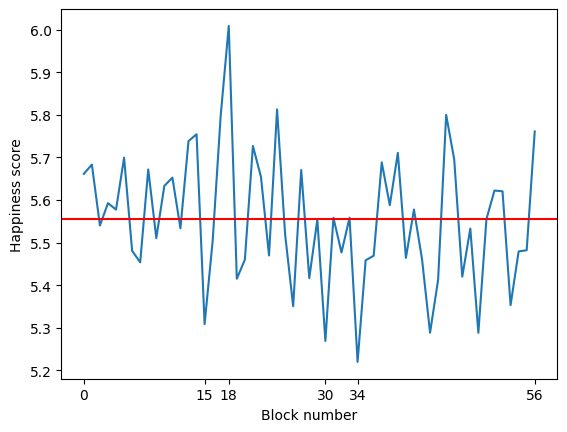

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=range(len(valences)), y=valences)
plt.axhline(y=np.average(valences), color='r', linestyle='-')
plt.xticks([0, 15, 18, 30, 34, 56]);
plt.xlabel('Block number')
plt.ylabel('Happiness score')

In [81]:
' '.join(blocks[15])

'range till man drop lottery sure fire enough kindle cowards melting spirits women cause vs bond secret romans spoke word honesty honesty shall fall priests cowards men old suffering welcome bad causes creatures men doubt th spirits cause performance drop blood roman guilty particle promise hath past shall sound stand strong vs let vs let vs purchase vs good opinion buy deeds shall hands shall buried name let vs follow thing men begin indeed fit shall man else well meet well shall know may well stretch annoy vs let fall together course bloody cut head like wrath death afterwards let'

Above: Act 2, Scene 1: Rome, Brutus' orchard:

*Brutus: ... So let high-sighted tyranny range on,
Till each man drop by lottery. But if these,
As I am sure they do, bear fire enough
To kindle cowards, and to steel with valour
The melting spirits of women; then, countrymen,
What need we any spur but our own cause
To prick us to redress? what other bond
Than secret Romans, that have spoke the word,
And will not palter? and what other oath
Than honesty to honesty engag’d,
That this shall be, or we will fall for it?
Swear priests and cowards, and men cautelous,
Old feeble carrions, and such suffering souls
That welcome wrongs; unto bad causes swear
Such creatures as men doubt; but do not stain
The even virtue of our enterprise,
Nor th’ insuppressive mettle of our spirits,
To think that or our cause or our performance
Did need an oath; when every drop of blood
That every Roman bears, and nobly bears,
Is guilty of a several bastardy,
If he do break the smallest particle
Of any promise that hath pass’d from him.*

 CASSIUS.
But what of Cicero? Shall we sound him?
I think he will stand very strong with us.

CASCA.
Let us not leave him out.

CINNA.
No, by no means.

METELLUS.
O, let us have him, for his silver hairs
Will purchase us a good opinion,
And buy men’s voices to commend our deeds.
It shall be said, his judgement rul’d our hands;
Our youths and wildness shall no whit appear,
But all be buried in his gravity.

BRUTUS.
O, name him not; let us not break with him;
For he will never follow anything
That other men begin.

CASSIUS.
Then leave him out.

CASCA.
Indeed, he is not fit.

DECIUS.
Shall no man else be touch’d but only Caesar?

CASSIUS.
Decius, well urg’d. I think it is not meet,
Mark Antony, so well belov’d of Caesar,
Should outlive Caesar: we shall find of him
A shrewd contriver; and you know, his means,
If he improve them, may well stretch so far
As to annoy us all; which to prevent,
Let Antony and Caesar fall together.

BRUTUS.
Our course will seem too bloody, Caius Cassius,
To cut the head off, and then hack the limbs,
Like wrath in death, and envy afterwards;
For Antony is but a limb of Caesar.
Let...

In [82]:
' '.join(blocks[18])

'right place ought know knees beauty great vow make vs one men night resort hide faces gentle por gentle within bond marriage tell know secrets sort comfort bed sometimes dwell good pleasure wife true wife visit sad heart por true know secret woman woman lord wife woman woman well daughter stronger sex father tell em made strong voluntary wound patience secrets ye gods render worthy noble wife one go thy shall secrets heart thee sad hast exit enter man would speak boy stand aside good tongue time chose would hand worthy name honor hand gods romans bow rome thou like'

In [83]:
' '.join(blocks[34])

'ha great wrong ha hee masters worse come place mark ye words would take crown therefore ambitious found eyes red fire weeping man rome begins yesterday word might stood world lies none hearts rage wrong wrong know men wrong rather choose wrong dead wrong wrong men found let commons testament pardon would go dead wounds dip sacred blood yea memory dying mention within rich issue wee l patience gentle friends must read know lou wood stones men men hearing make mad good know would come read wee l shall vs patient stay shot tell wrong men whose men testament read'

In [100]:
brutus_speach = "Our course will seem too bloody, Caius Cassius," + "To cut the head off, and then hack the limbs,"+"Like wrath in death, and envy afterwards;"+"For Antony is but a limb of Caesar."+"Let us be sacrificers, but not butchers, Caius."+"We all stand up against the spirit of Caesar,"+"And in the spirit of men there is no blood."+"O, that we then could come by Caesar’s spirit,"+"And not dismember Caesar! But, alas,"+"Caesar must bleed for it! And, gentle friends,"+"Let’s kill him boldly, but not wrathfully;"+"Let’s carve him as a dish fit for the gods,"+"Not hew him as a carcass fit for hounds."+"And let our hearts, as subtle masters do,"+"Stir up their servants to an act of rage,"+"And after seem to chide ’em. This shall mark"+"Our purpose necessary, and not envious;"+"Which so appearing to the common eyes,"+"We shall be call’d purgers, not murderers."+"And for Mark Antony, think not of him;"+"For he can do no more than Caesar’s arm"+"When Caesar’s head is off. "

emotion(brutus_speach,labMT,shift=True,happsList=labMTvector)[0]

5.143076923077003

In [84]:
block_size = 1000

tokens = preprocess_text(list(words))
blocks = []

for i in range(0, len(tokens), block_size):
    block = tokens[i:i+block_size]
    blocks.append(block)

valences2 = []
for block in blocks:
    s = ' '.join(block)
    sValence,sFvec = emotion(s,labMT,shift=True,happsList=labMTvector)
    valences2.append(sValence)

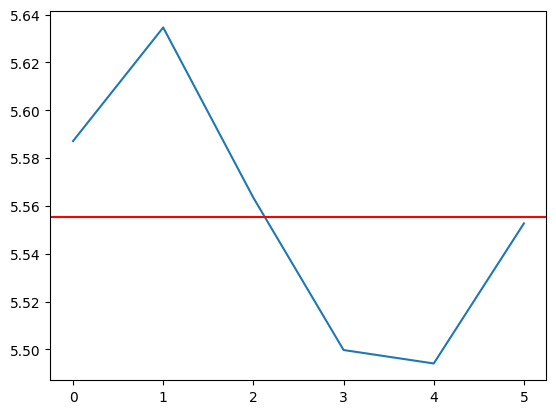

In [85]:
sns.lineplot(x=range(len(valences2)), y=valences2)
plt.axhline(y=np.average(valences2), color='r', linestyle='-')


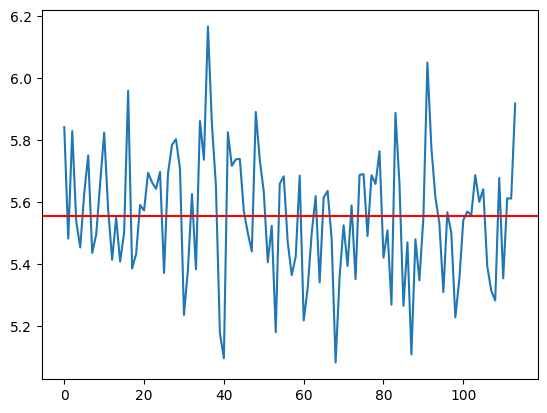

In [60]:
block_size = 50

tokens = preprocess_text(list(words))
blocks = []

for i in range(0, len(tokens), block_size):
    block = tokens[i:i+block_size]
    blocks.append(block)

valences2 = []
for block in blocks:
    s = ' '.join(block)
    sValence,sFvec = emotion(s,labMT,shift=True,happsList=labMTvector)
    valences2.append(sValence)
sns.lineplot(x=range(len(valences2)), y=valences2)
plt.axhline(y=np.average(valences2), color='r', linestyle='-')


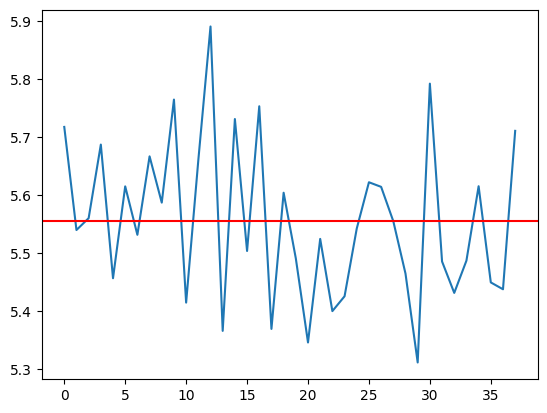

In [65]:
block_size = 150

tokens = preprocess_text(list(words))
blocks = []

for i in range(0, len(tokens), block_size):
    block = tokens[i:i+block_size]
    blocks.append(block)

valences2 = []
for block in blocks:
    s = ' '.join(block)
    sValence,sFvec = emotion(s,labMT,shift=True,happsList=labMTvector)
    valences2.append(sValence)
sns.lineplot(x=range(len(valences2)), y=valences2)
plt.axhline(y=np.average(valences2), color='r', linestyle='-')


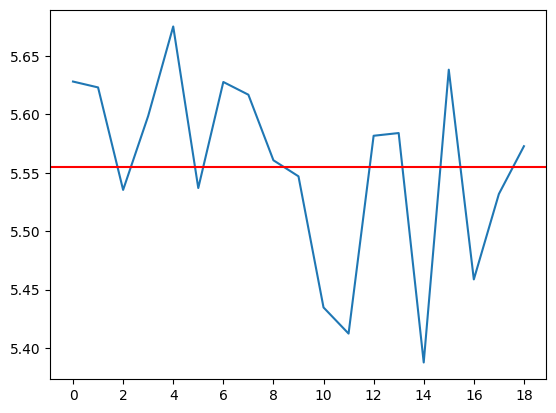

In [68]:
block_size = 300

tokens = preprocess_text(list(words))
blocks = []

for i in range(0, len(tokens), block_size):
    block = tokens[i:i+block_size]
    blocks.append(block)

valences2 = []
for block in blocks:
    s = ' '.join(block)
    sValence,sFvec = emotion(s,labMT,shift=True,happsList=labMTvector)
    valences2.append(sValence)
sns.lineplot(x=range(len(valences2)), y=valences2)
plt.axhline(y=np.average(valences2), color='r', linestyle='-')
plt.xticks(list(range(0,19,2)));


In [108]:
#Plots 

def plot_multiple_block_numbers(block_sizes, tokens):
    fig, ax  = plt.subplots(1, len(block_sizes), figsize=(20, 5))
    for i in range(len(block_sizes)):
        blocks = []
        block_size = block_sizes[i]

        for j in range(0, len(tokens), block_size):
            block = tokens[j:j+block_size]
            blocks.append(block)

        valences2 = []
        for block in blocks:
            s = ' '.join(block)
            sValence,sFvec = emotion(s,labMT,shift=True,happsList=labMTvector)
            valences2.append(sValence)
            
        sns.lineplot(x=range(len(valences2)), y=valences2, ax = ax[i])
        ax[i].axhline(y=np.average(valences2), color='r', linestyle='-')
        ax[i].set_title('Block Size: {}'.format(block_size))
        ax[i].set_aspect(1.0/ax[i].get_data_ratio(), adjustable='box')


        

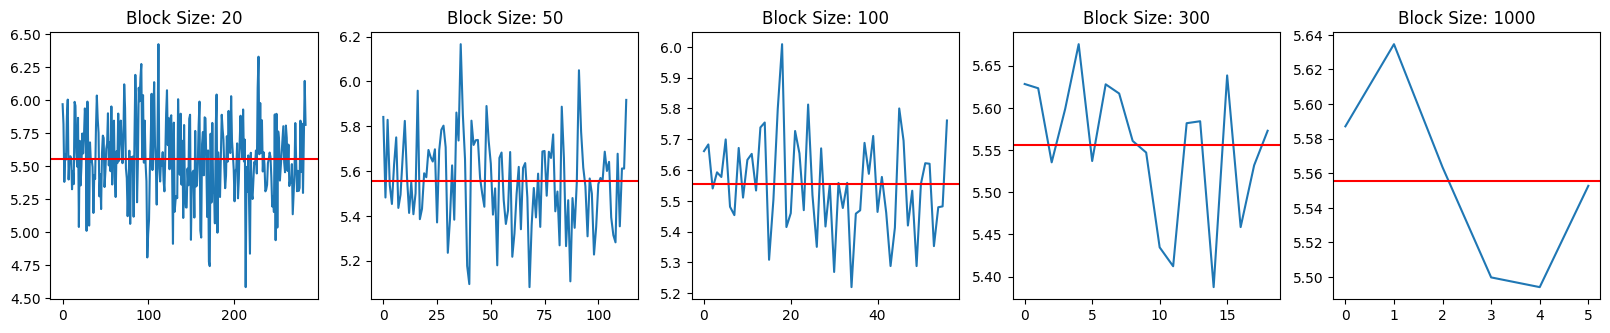

In [97]:
plot_multiple_block_numbers([20, 50, 100, 300, 1000], tokens)

In [122]:
brutus_speech="No, not an oath. If not the face of men, The sufferance of our souls, the time’s abuse— If these be motives weak, break off betimes, And every man hence to his idle bed. So let high-sighted tyranny range on, Till each man drop by lottery. But if these, As I am sure they do, bear fire enough To kindle cowards, and to steel with valour The melting spirits of women; then, countrymen, What need we any spur but our own cause To prick us to redress? what other bond Than secret Romans, that have spoke the word, And will not palter? and what other oath Than honesty to honesty engag’d, That this shall be, or we will fall for it? Swear priests and cowards, and men cautelous, Old feeble carrions, and such suffering souls That welcome wrongs; unto bad causes swear Such creatures as men doubt; but do not stain The even virtue of our enterprise, Nor th’ insuppressive mettle of our spirits, To think that or our cause or our performance Did need an oath; when every drop of blood That every Roman bears, and nobly bears, Is guilty of a several bastardy, If he do break the smallest particle Of any promise that hath pass’d from him. "

print(emotion(brutus_speech,labMT, shift=True,happsList=labMTvector)[0])

list_of_words = brutus_speech.split()
token2=preprocess_text(list_of_words)
brutus_speech_filtered = ' '.join(token2)
print(emotion(brutus_speech_filtered,labMT, shift=True,happsList=labMTvector)[0])

5.182566844919807
5.318999999999998


In [125]:
brutus_speech2 = "Our course will seem too bloody, Caius Cassius," + "To cut the head off, and then hack the limbs,"+"Like wrath in death, and envy afterwards;"+"For Antony is but a limb of Caesar."+"Let us be sacrificers, but not butchers, Caius."+"We all stand up against the spirit of Caesar,"+"And in the spirit of men there is no blood."+"O, that we then could come by Caesar’s spirit,"+"And not dismember Caesar! But, alas,"+"Caesar must bleed for it! And, gentle friends,"+"Let’s kill him boldly, but not wrathfully;"+"Let’s carve him as a dish fit for the gods,"+"Not hew him as a carcass fit for hounds."+"And let our hearts, as subtle masters do,"+"Stir up their servants to an act of rage,"+"And after seem to chide ’em. This shall mark"+"Our purpose necessary, and not envious;"+"Which so appearing to the common eyes,"+"We shall be call’d purgers, not murderers."+"And for Mark Antony, think not of him;"+"For he can do no more than Caesar’s arm"+"When Caesar’s head is off. "
brutus_speech2 = brutus_speech2.lower()
print(emotion(brutus_speech2,labMT, shift=True,happsList=labMTvector)[0])

list_of_words = brutus_speech2.split()
token2=preprocess_text(list_of_words)
brutus_speech_filtered2 = ' '.join(token2)
print(emotion(brutus_speech_filtered2,labMT, shift=True,happsList=labMTvector)[0])


5.143076923077003
5.326060606060604


The preprocessing actually increased the happiness score! Let's try without preprocessing.

<Axes: >

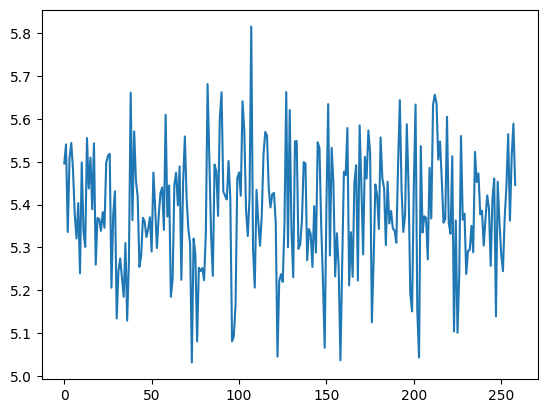

In [115]:
block_size = 100
blocks = []

for i in range(0, len(words), block_size):
    block = words[i:i+block_size]
    blocks.append(block)

valences2 = []
for block in blocks:
    s = ' '.join(block)
    sValence,sFvec = emotion(s,labMT,shift=True,happsList=labMTvector)
    valences2.append(sValence)

sns.lineplot(x=range(len(valences2)), y=valences2,)

<Axes: >

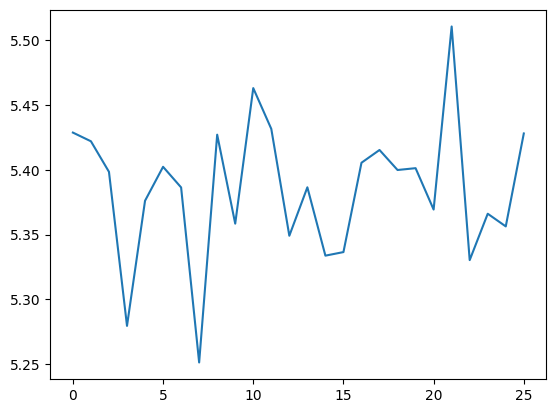

In [116]:
#No filtering
block_size = 1000
blocks = []

for i in range(0, len(words), block_size):
    block = words[i:i+block_size]
    blocks.append(block)

valences2 = []
for block in blocks:
    s = ' '.join(block)
    sValence,sFvec = emotion(s,labMT,shift=True,happsList=labMTvector)
    valences2.append(sValence)

sns.lineplot(x=range(len(valences2)), y=valences2,)